In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [3]:
train = pd.read_csv('../data/Train.csv')
test = pd.read_csv('../data/Test.csv')

print('Train shape', train.shape)
print('Test shape', test.shape)

Train shape (31647, 18)
Test shape (13564, 17)


In [161]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,...,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,prev_campaign_contact,balance_ind,log_balance,log_last_contact_duration,log_num_contacts_in_campaign,log_num_contacts_prev_campaign
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,...,4.0,0,unknown,0,no,True,9.024625,5.714063,1.410987,-2.302585
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,...,2.0,1,other,0,yes,True,9.099867,4.963544,0.741937,0.095310
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,...,4.0,0,unknown,0,no,True,9.068327,4.616110,1.410987,-2.302585
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,...,3.0,0,unknown,0,no,True,8.989956,4.844974,1.131402,-2.302585
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,...,2.0,0,unknown,0,no,True,9.145492,3.893859,0.741937,-2.302585


In [7]:
# checking null values
print('missing values in train')
print(train.isna().sum())

print('missing values in test')
print(test.isna().sum())

missing values in train
id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
missing values in test
id                                      0
customer_age                          270
job_type                                0
marital                                81
education       

In [67]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,31028,31028,id_32705,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,31028.0,NaN,NaN,NaN,40.439216,10.751392,18.0,32.0,39.0,48.0,97.0
job_type,31028,12,blue-collar,6688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,31028,4,married,18580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,31028,4,secondary,15943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,31028,2,no,30490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,30637.0,NaN,NaN,NaN,1369.453308,3095.816969,-8020.0,72.0,449.0,1412.0,102128.0
housing_loan,31028,2,yes,17370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_loan,30882,2,no,25956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
communication_type,31028,3,cellular,20083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,13294,13294,id_8006,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,13294.0,NaN,NaN,NaN,40.450429,10.747881,18.0,32.0,39.0,48.0,94.0
job_type,13294,12,blue-collar,2848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,13294,4,married,7950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,13294,4,secondary,6817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,13294,2,no,13036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,13116.0,NaN,NaN,NaN,1342.659347,2845.817345,-6849.0,70.75,448.0,1467.25,71187.0
housing_loan,13294,2,yes,7285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_loan,13221,2,no,11091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
communication_type,13294,3,cellular,8636,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing data - Imputation and removal

In [53]:
def hist_box_col(series):
    fig, ax = plt.subplots(2, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
    ax[0].boxplot(series, vert=False)
    ax[1].hist(series)
    plt.show()
    
def bar_col(series):
    plt.figure(figsize=(6,6))
    s_counts = series.value_counts()
    plt.bar(s_counts.index, s_counts)
    plt.show()

**Customer Age**

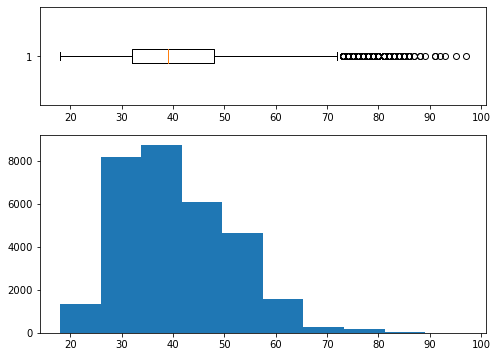

In [54]:
hist_box_col(train['customer_age'])

In [55]:
# checking unique customer if possible to impute or not
if train['id'].nunique() == len(train):
    print('Each entry is unique customer and so age cant be identified from other entries ')

Each entry is unique customer and so age cant be identified from other entries 


In [59]:
# null values if entries with negative age are removed
train = train[~train['customer_age'].isna()]
print(train.isna().sum())

test = test[~test['customer_age'].isna()]
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                               391
housing_loan                            0
personal_loan                         146
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 303
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25315
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default              

Removing the members where customer age is not available as there are just 2% such entries in both train and test

**Marital status**

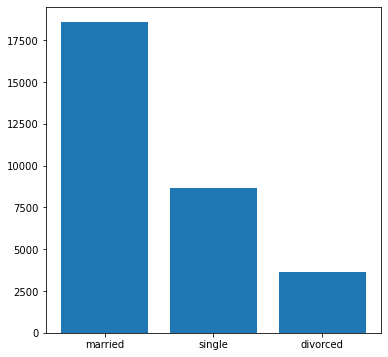

In [57]:
bar_col(train['marital'])

In [58]:
# refs - https://docs.1010data.com/Tutorials/MachineLearningExamples/BankMarketingDataSet_2.html
# based on the ref we will replace nans with unknown
train.loc[train['marital'].isna(), 'marital'] = 'unknown'
test.loc[test['marital'].isna(), 'marital'] = 'unknown'

**Balance**

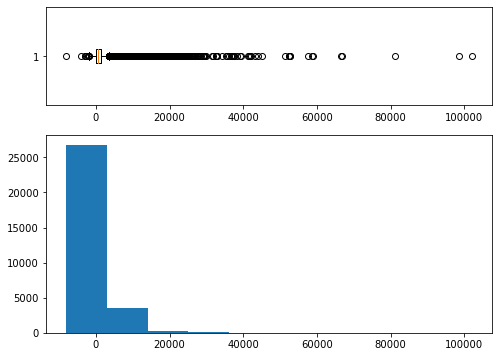

In [84]:
hist_box_col(train.loc[~train['balance'].isna(), 'balance'])

In [85]:
# null values if entries with negative age are removed
train = train[~train['balance'].isna()]
print(train.isna().sum())

test = test[~test['balance'].isna()]
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                         146
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 296
num_contacts_in_campaign              111
days_since_prev_campaign_contact    24997
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default              

Removing the members where balance is not available as there are just 1% such entries in both train and test

**Personal Loan**

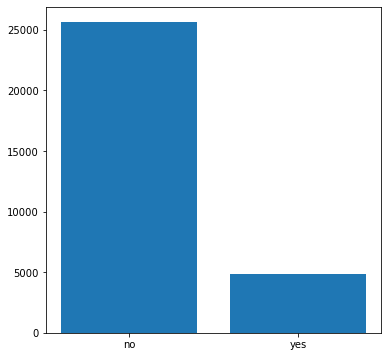

In [86]:
bar_col(train['personal_loan'])

In [87]:
# null values if entries with negative age are removed
train = train[~train['personal_loan'].isna()]
print(train.isna().sum())

test = test[~test['personal_loan'].isna()]
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 293
num_contacts_in_campaign              111
days_since_prev_campaign_contact    24877
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default              

Removing the members where personal loan info is not available as there are less than 1% such entries in both train and test

**Last contact duration**

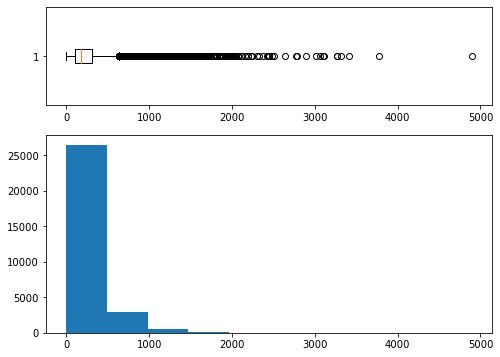

In [100]:
hist_box_col(train.loc[~train['last_contact_duration'].isna(), 'last_contact_duration'])

In [101]:
train['last_contact_duration'].describe(percentiles=[x/10 for x in range(10)])

count    30198.000000
mean       256.424531
std        256.806349
min          0.000000
0%           0.000000
10%         57.000000
20%         88.000000
30%        117.000000
40%        146.000000
50%        180.000000
60%        221.000000
70%        277.000000
80%        365.000000
90%        546.000000
max       4900.000000
Name: last_contact_duration, dtype: float64

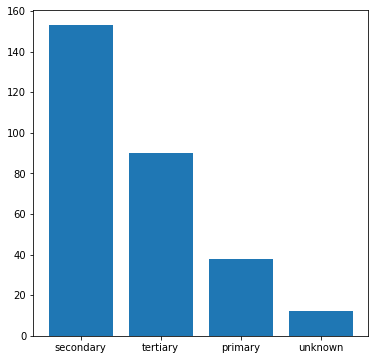

In [102]:
bar_col(train.loc[train['last_contact_duration'].isna(), 'education'])

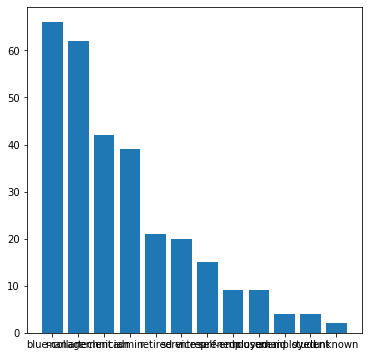

In [103]:
bar_col(train.loc[train['last_contact_duration'].isna(), 'job_type'])

In [106]:
train.loc[train['last_contact_duration'].isna(), 'last_contact_duration'] = np.nanpercentile(train['last_contact_duration'], 0.5)
print(train.isna().sum())

test.loc[test['last_contact_duration'].isna(), 'last_contact_duration'] = np.nanpercentile(test['last_contact_duration'], 0.5)
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign              111
days_since_prev_campaign_contact    24877
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default              

Taking median as the value to impute for missing last contant duration column

**Number of contacts in the campaign**

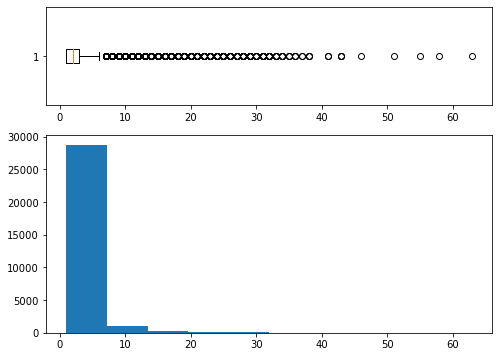

In [107]:
hist_box_col(train.loc[~train['num_contacts_in_campaign'].isna(), 'num_contacts_in_campaign'])

In [108]:
train.loc[train['num_contacts_in_campaign'].isna(), 'num_contacts_in_campaign'] = np.nanpercentile(train['num_contacts_in_campaign'], 0.5)
print(train.isna().sum())

test.loc[test['num_contacts_in_campaign'].isna(), 'num_contacts_in_campaign'] = np.nanpercentile(test['num_contacts_in_campaign'], 0.5)
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign                0
days_since_prev_campaign_contact    24877
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default              

Taking median as the value to impute for missing numbers of contacts in campaign column

**Days since previous campaign contact**

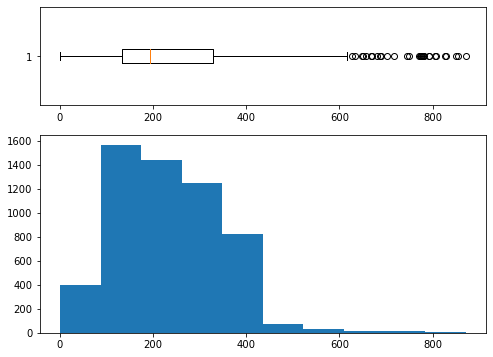

In [109]:
hist_box_col(train.loc[~train['days_since_prev_campaign_contact'].isna(), 'days_since_prev_campaign_contact'])

In [111]:
train['days_since_prev_campaign_contact'].describe(percentiles=[x/10 for x in range(10)])

count    5614.000000
mean      225.230495
std       115.290350
min         1.000000
0%          1.000000
10%        91.000000
20%       108.000000
30%       161.000000
40%       181.000000
50%       195.000000
60%       259.000000
70%       301.000000
80%       343.000000
90%       363.000000
max       871.000000
Name: days_since_prev_campaign_contact, dtype: float64

In [110]:
train.loc[~train['days_since_prev_campaign_contact'].isna()]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
10,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,19,nov,1195.0,3.0,160.0,1,failure,0
13,id_43255,50.0,management,married,secondary,no,4873.0,no,no,telephone,6,feb,381.0,6.0,213.0,9,failure,0
15,id_12246,42.0,management,married,tertiary,no,55.0,yes,no,cellular,17,nov,57.0,1.0,126.0,3,failure,0
17,id_31616,41.0,technician,married,secondary,no,-3.0,yes,no,cellular,16,apr,138.0,1.0,300.0,1,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31629,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,2,jul,141.0,1.0,91.0,6,failure,0
31636,id_24068,45.0,services,divorced,primary,no,92.0,yes,no,cellular,17,apr,463.0,2.0,339.0,1,failure,0
31640,id_41466,51.0,management,single,tertiary,no,298.0,yes,no,cellular,15,may,432.0,4.0,375.0,1,failure,1
31641,id_31483,26.0,technician,single,secondary,no,459.0,no,no,cellular,29,jan,237.0,1.0,182.0,8,other,0


In [112]:
train['prev_campaign_contact'] = np.where(train['days_since_prev_campaign_contact'].isna(), 'no', 'yes')
train.drop('days_since_prev_campaign_contact', axis=1, inplace=True)

test['prev_campaign_contact'] = np.where(test['days_since_prev_campaign_contact'].isna(), 'no', 'yes')
test.drop('days_since_prev_campaign_contact', axis=1, inplace=True)

In [113]:
print(train.isna().sum())

print(test.isna().sum())

id                            0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
prev_campaign_contact         0
dtype: int64
id                            0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration      

Since days since previous contact is not present is 90%+ data we will create additional column as an indicator column whether the customer was previously contacted or not.

In [115]:
assert train.isna().sum().sum() == 0
print('train size', len(train))

assert test.isna().sum().sum() == 0
print('test size', len(test))

train size 30491
test size 13043


### Outlier detection and removal

In [129]:
train.dtypes

id                             object
customer_age                  float64
job_type                       object
marital                        object
education                      object
default                        object
balance                       float64
housing_loan                   object
personal_loan                  object
communication_type             object
day_of_month                    int64
month                          object
last_contact_duration         float64
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome          object
term_deposit_subscribed         int64
prev_campaign_contact          object
dtype: object

Plotting for columns customer_age


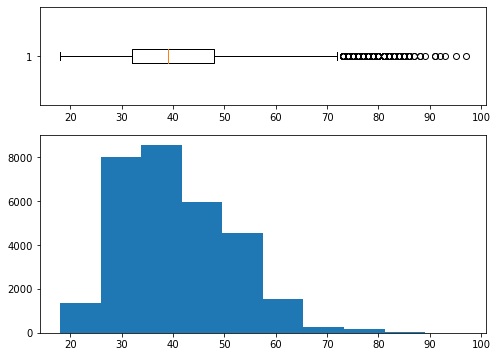

Plotting for columns job_type


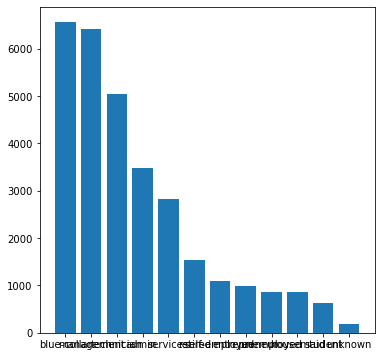

Plotting for columns marital


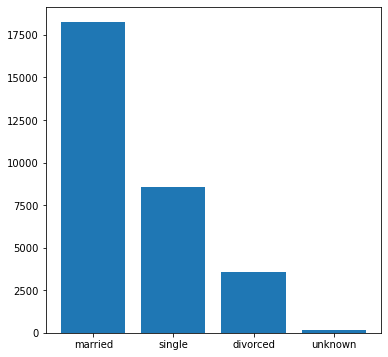

Plotting for columns education


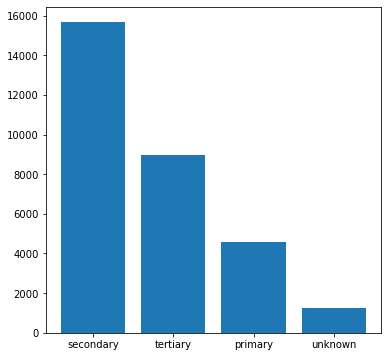

Plotting for columns default


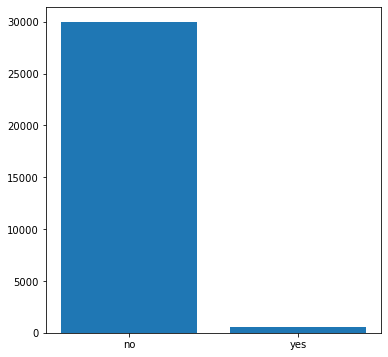

Plotting for columns balance


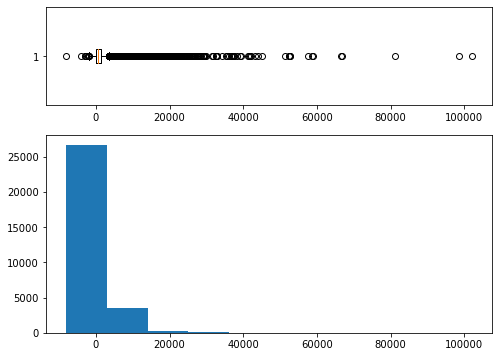

Plotting for columns housing_loan


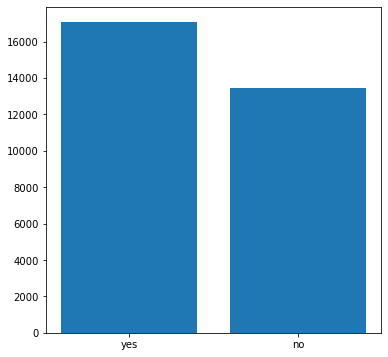

Plotting for columns personal_loan


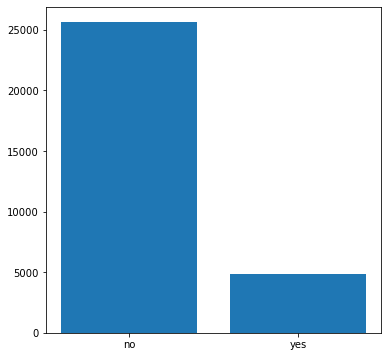

Plotting for columns communication_type


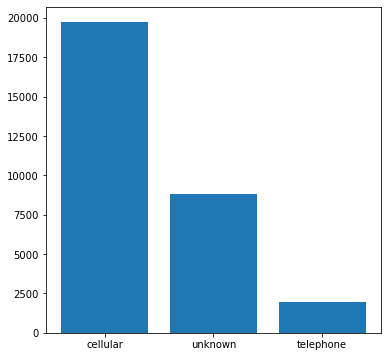

Plotting for columns day_of_month


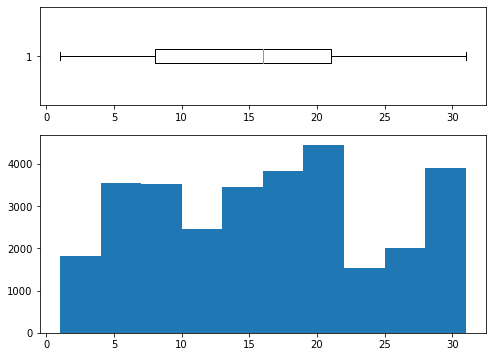

Plotting for columns month


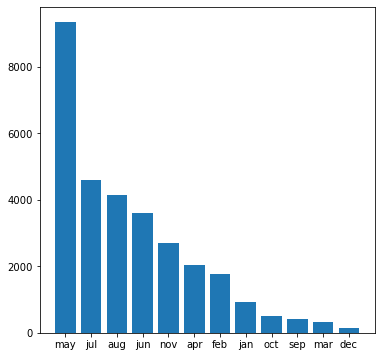

Plotting for columns last_contact_duration


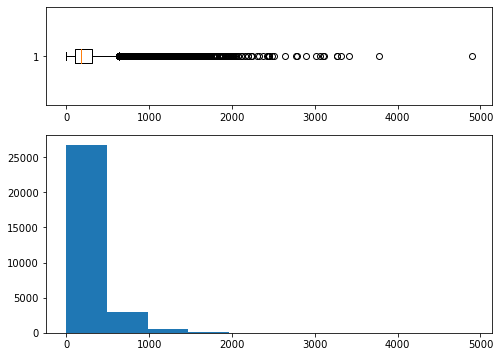

Plotting for columns num_contacts_in_campaign


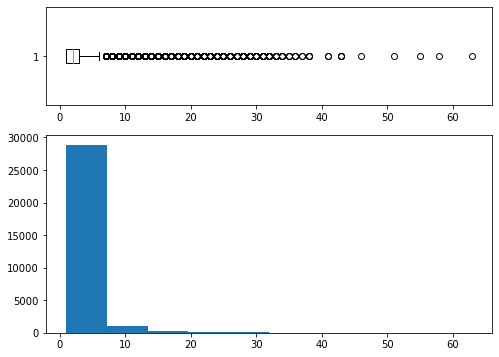

Plotting for columns num_contacts_prev_campaign


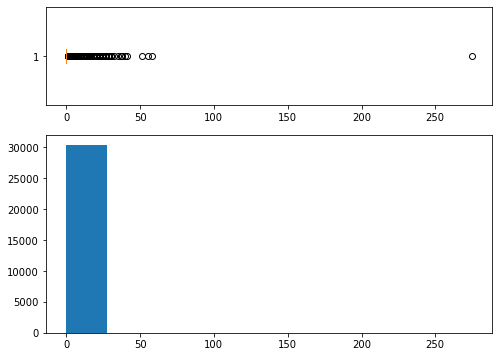

Plotting for columns prev_campaign_outcome


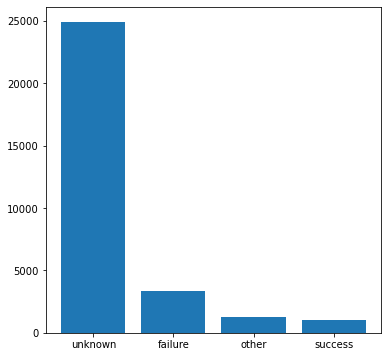

Plotting for columns term_deposit_subscribed


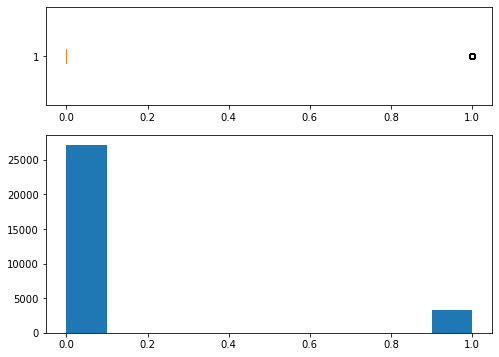

Plotting for columns prev_campaign_contact


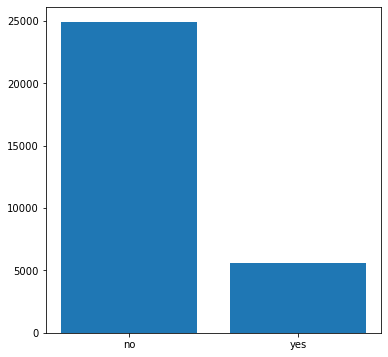

In [132]:
data_cols = train.columns

for col in data_cols[1:]:
    print('Plotting for columns', col)
    if train[col].dtype in ['float64', 'int64']:
        hist_box_col(train[col])
    else:
        bar_col(train[col])

Plotting for columns customer_age


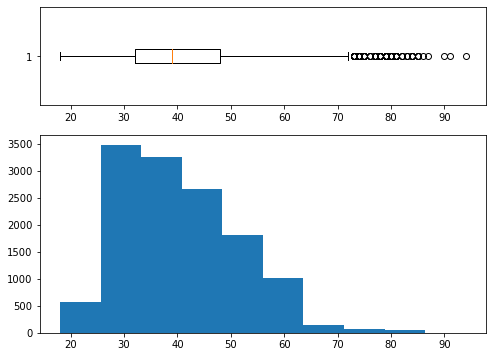

Plotting for columns job_type


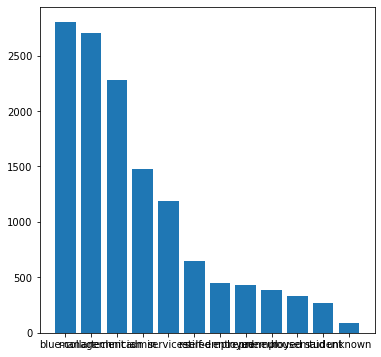

Plotting for columns marital


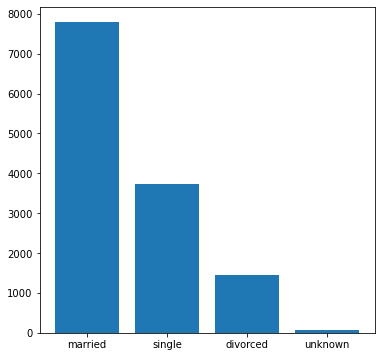

Plotting for columns education


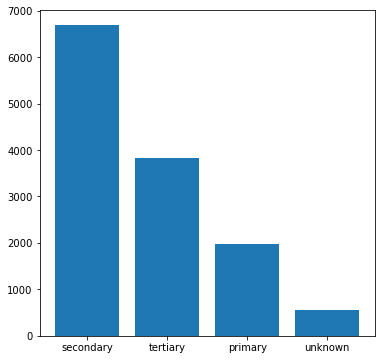

Plotting for columns default


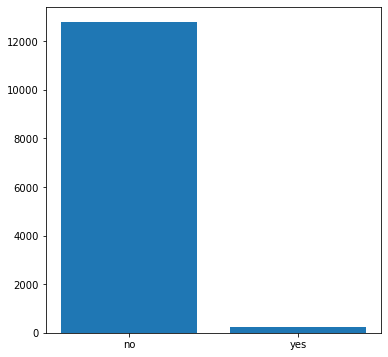

Plotting for columns balance


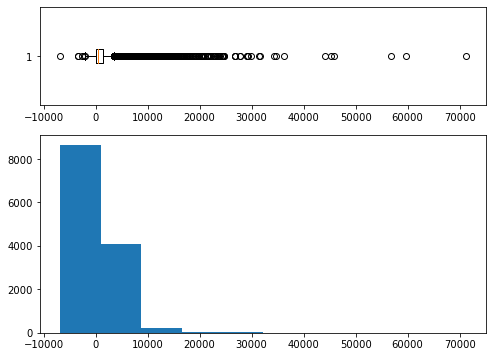

Plotting for columns housing_loan


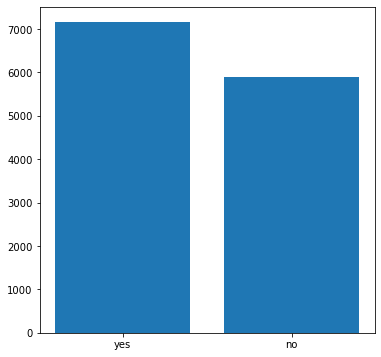

Plotting for columns personal_loan


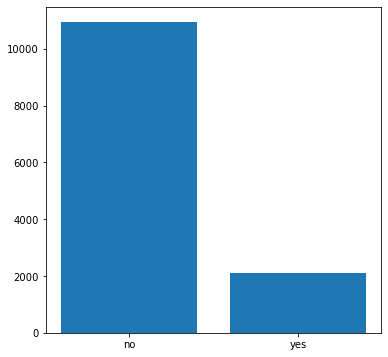

Plotting for columns communication_type


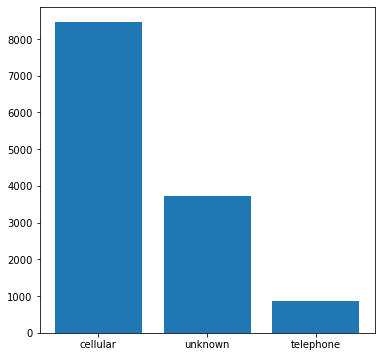

Plotting for columns day_of_month


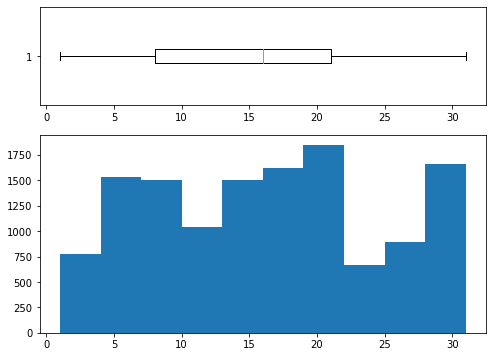

Plotting for columns month


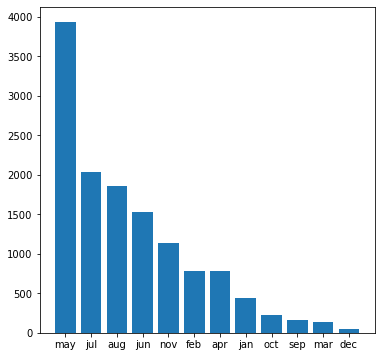

Plotting for columns last_contact_duration


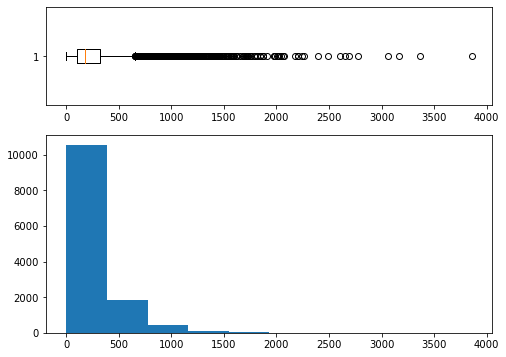

Plotting for columns num_contacts_in_campaign


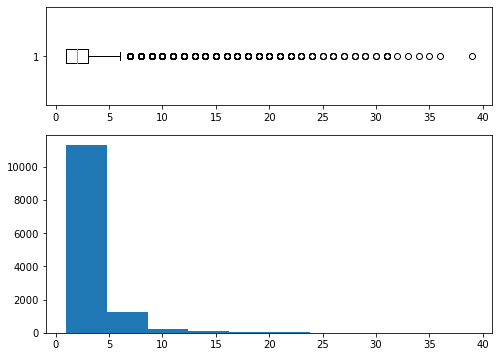

Plotting for columns num_contacts_prev_campaign


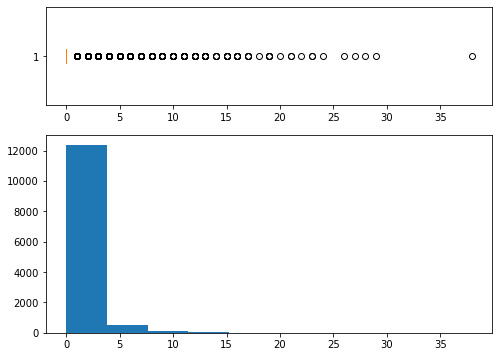

Plotting for columns prev_campaign_outcome


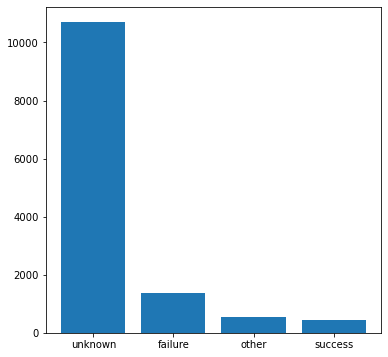

Plotting for columns prev_campaign_contact


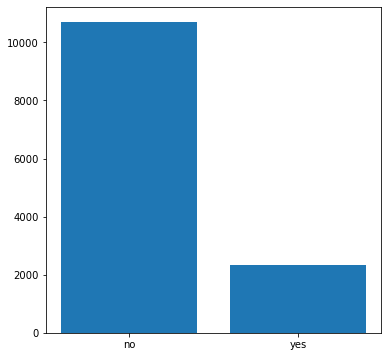

In [136]:
data_cols = test.columns

for col in data_cols[1:]:
    print('Plotting for columns', col)
    if test[col].dtype in ['float64', 'int64']:
        hist_box_col(test[col])
    else:
        bar_col(test[col])

In [133]:
data_cols

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed',
       'prev_campaign_contact'],
      dtype='object')

*Observations for train* - 
1. Balance - needs transformation
2. Last contact duration - needs transformation
3. Number of contacts in campaign - needs transformation
4. Number of contacts in previous campaign - needs transformation
5. Number of contacts in previous campaign - have one outlier with value > 250 while every other under entry is under 100
6. Rest all categorical variables doesn't have highly skewed distribution

*Observation for test* -

Same as train, no outlier identified based on distributions

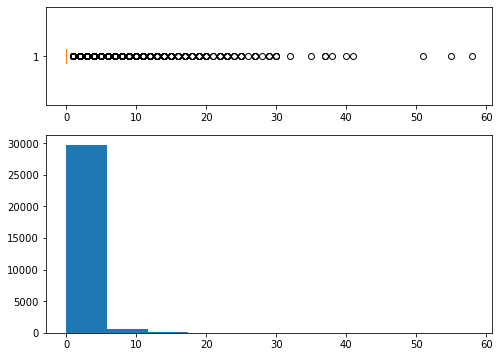

In [137]:
# removing outlier in contacts in prev campaign columns
train = train[train['num_contacts_prev_campaign'] != train['num_contacts_prev_campaign'].max()]

hist_box_col(train['num_contacts_prev_campaign'])

### Feature engineering - Transformation

Columns for transformation - 
1. Balance - add 10k to the balance and take log transformation, also create another variable to indicate negative balance
2. Last contact duration - log transformation add small numeric value due to 0 entries
3. Number of contacts in campaign - log transformation add small numeric value due to 0 entries
4. Number of contacts in previous campaign - log transformation add small numeric value due to 0 entries

In [139]:
alpha = 0.1

In [144]:
# balance
train['balance_ind'] = train['balance'] > 0
test['balance_ind'] = test['balance'] > 0

base_addn = -min(train['balance'].min(), test['balance'].min()) + alpha

train['log_balance'] = np.log(base_addn + train['balance'])
test['log_balance'] = np.log(base_addn + test['balance'])

Log balance for train


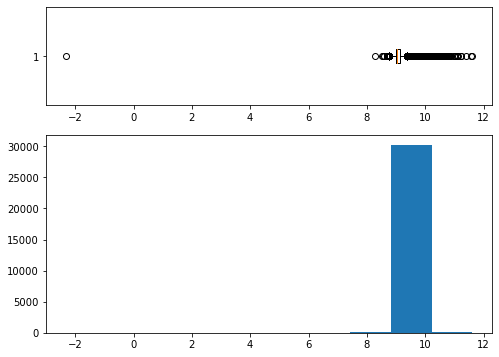

Log balance for test


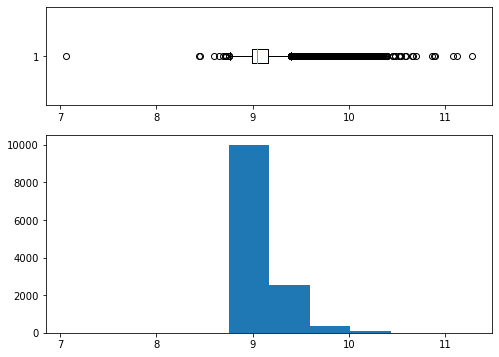

In [154]:
print('Log balance for train')
hist_box_col(train['log_balance'])

print('Log balance for test')
hist_box_col(test['log_balance'])

Negative balance indicator for train


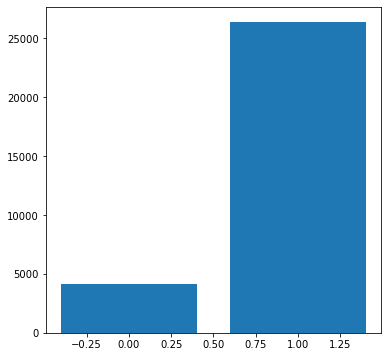

Negative balance indicator for test


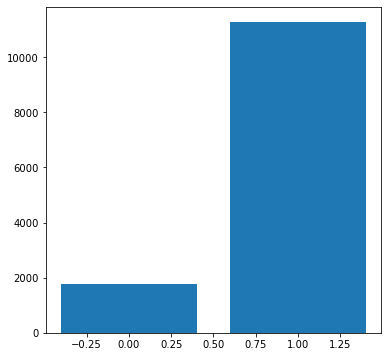

In [155]:
print('Negative balance indicator for train')
bar_col(train['balance_ind'])

print('Negative balance indicator for test')
bar_col(test['balance_ind'])

Log last_contact_duration for train


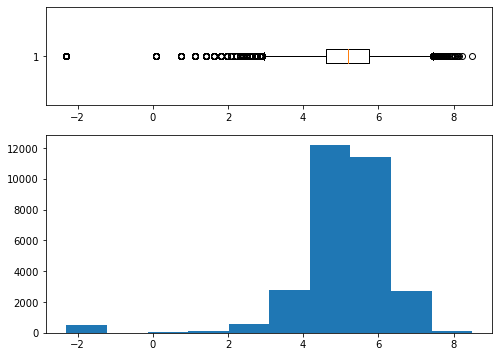

Log last_contact_duration test


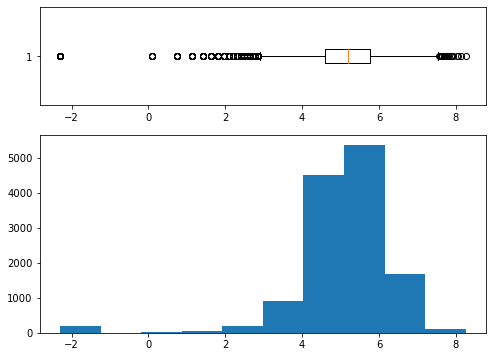

Log num_contacts_in_campaign for train


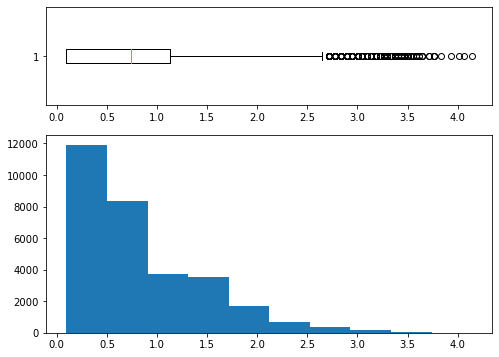

Log num_contacts_in_campaign test


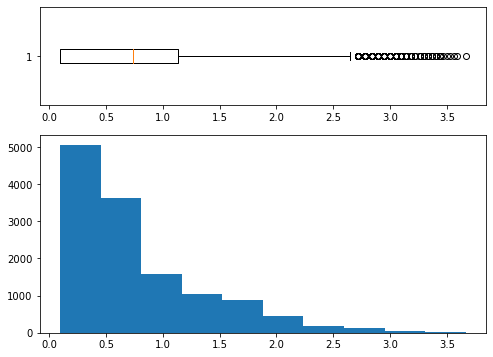

Log num_contacts_prev_campaign for train


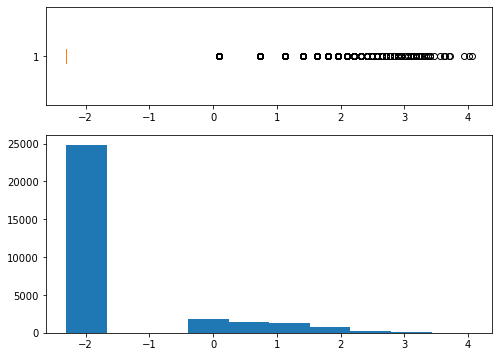

Log num_contacts_prev_campaign test


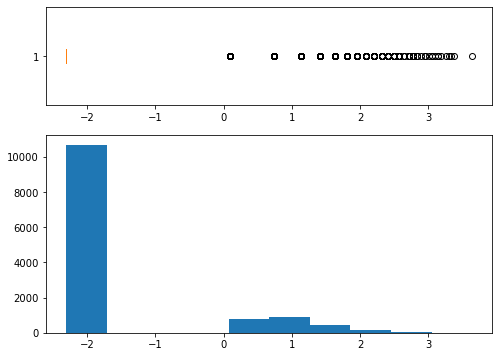

In [157]:
# rest three columns
col_to_transform = ['last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign']

for col in col_to_transform:

    train['log_' + col] = np.log(alpha + train[col])
    test['log_' + col] = np.log(alpha + test[col])
    
    print('Log', col, 'for train')
    hist_box_col(train['log_' + col])

    print('Log', col, 'test')
    hist_box_col(test['log_' + col])
    

### Feature engineering - correlations and encoding

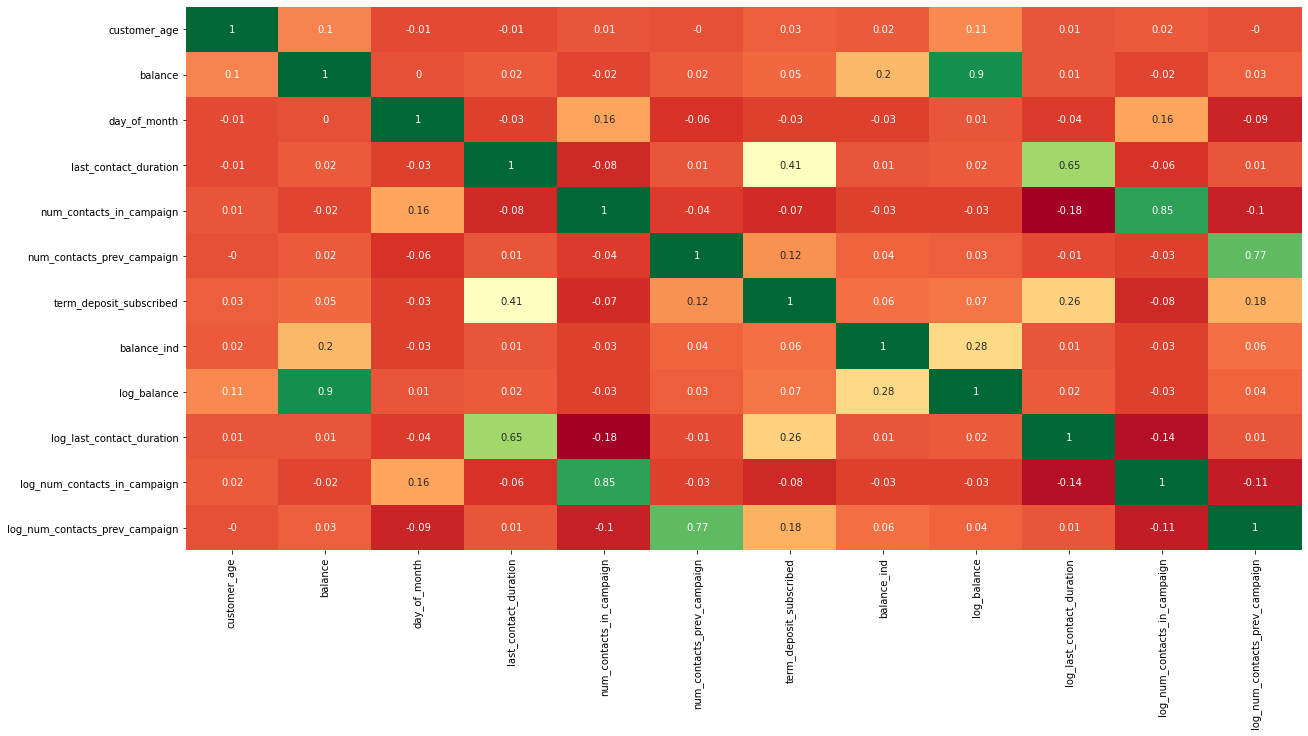

In [160]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(round(train.corr(), 2), cmap='RdYlGn', annot=True, cbar=False)

Correlation is high only for orginal and transformed variables for rest its well below 0.5

Next steps - 
EDA
1. Interesting bi-variate plots
2. Logistic regression - vif
3. Trees variable importance

Feature - 
1. One hot encoding
2. Cyclicity for days/month